<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h6><center>M.Sc. DSBA & AI</center></h6>
<h3><center>Ensemble learning from theory to practice</center></h3>


<h1>
<hr style=" border:none; height:3px;">
<center>Boosting</center>
<hr style=" border:none; height:3px;">
</h1>

The objective of this session is twofold :
+ Do some course application exercises (the pdf is on Edunao)
+ Use a kind of **ensemble methods** called **boosting** approaches for classification and regression problems in python (`sklearn` module). 
This lab is free from some of the examples shown in the excellent `Scikit-Learn` documentation on [Adaboost for the classification case](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) and [Gradient boosting for both classification and regression problems](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

Useful reference links:
+ [`Scikit-learn` website](https://scikit-learn.org/stable/index.html)
+ [`NumPy` documentation](https://docs.scipy.org/doc/numpy/user/index.html)
+ [`SciPy` documentation](https://docs.scipy.org/doc/scipy/reference/)
+ [`MatPlotLib` documentation](https://matplotlib.org/)
+ [Python website](https://www.python.org/)






In his machine learning class project in the late 80’s, Kearns and Valiant asked the following [question](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf):

    Can a set of weak learners be combined to generate a strong learner (with low bias)?

The question was [answered in the positive by Schapire (1990)](https://www.cs.princeton.edu/~schapire/papers/strengthofweak.pdf), and implemented, with Freund, in the form of AdaBoost.

In the previous lab we study one kind of ensemble methods nammed bagging approaches where the principle is to aggregate several predictions from weak learners while hoping for a better result.
An amazing story can illustrate this principle of grouping weak models to improve the final result. This idea was also tested with pigeons. Scientists trained 16 pigeons (weak learners if ever there were ones) to identify pictures of magnified biopsies of possible breast cancers. On average, each pigeon had an accuracy of about 85%, but when the most popular answer among the group was selected, the accuracy jumped to 99% (see this [link](https://www.scientificamerican.com/article/using-pigeons-to-diagnose-cancer/) for more details).

The pigeon work above is a form of bootstrap aggregation (also known as bagging). In this lab, we explore two algorithms that use a different approach to answer Kearns and Valiant’s question: **AdaBoost** and **Gradient Boosting**, which are two different implementations of the idea behind boosting. 

Boosting is the second kind of ensemble methods. The principle of boosting is to evaluate a sequence of weak learners on several slightly modified versions of the training data. The decisions obtained are then combined by a weighted sum to obtain the final model. 

In the following we will explore the boosted algorithms cited using `Scikit-learn` and present some comparisons.


### AdaBoost

The Python library `Scikit-learn` provides a useful implementation of **AdaBoost**. In order to use it, a base estimator (that is to say, a weak learner) must first be selected. In what follows, we will use a `DecisionTreeClassifier`. Once this is done, a `AdaBoostClassifier` object is created, to which is fed the weak learner, the **number of estimators** and the **learning rate** (also known as the **shrinkage parameter**, a small positive number). In general, small learning rates will require a large number of estimators to provide adequate performance. By default, `Scikit-learn`’s implementation uses 50 estimators with a learning rate of 1.


## Two-Moons Classification

We use the classic two-moons dataset, consisting of two interleaving half circles with added noise, in order to test and compare classification results for **AdaBoost** (and **Gradient Boosting** in the next part of the lab). This dataset is conveniently built-in to `Scikit-learn` and accessible via  `make_moons`, which returns a data matrix `X ` and a label vector `y`. We can treat the dataset as a complete training set as we eventually use cross-validation to estimate the test error.

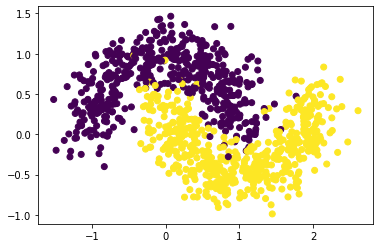

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
N = 1000
#The data
X,Y = make_moons(N,noise=0.2)
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

**Question 1:**

Classify the data using a decision tree i.e: using `DecisionTreeClassifier` with maximum depth of 3 (this structure will later be used for our weak learners). Then plot the result by using `meshgrid` from `numpy` which is very useful to evaluate functions on a grid.

**Solution**

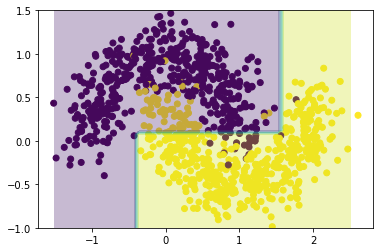

In [19]:
# Write code here to classify the data using a decision tree with maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,Y)
#Thanks to meshgrid from numpy an lindspace create a grid
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
#Predict on the grid values by using xx and yy
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Plot the classification result on the two-moons. You can use contourf() to vizualize the classes
plt.scatter(X[:,0],X[:,1], c = Y)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()



**Question 2:**

What do you think about the fit of this single decision tree?


**Solution**

As can be seen from the graph above, this single decision tree does not provide the best of fits.

Next, we obtain an AdaBoost classification. Let’s first consider a model consisting of 10 decision trees, and with a learning rate of 1/10.

**Question 3:**

Use `AdaBoostClassifier` to classify the data with the decision tree `clf` as weak learner by adding the parameters of 10 estimators and 0.1 for the learning rate value. 

**Solution**

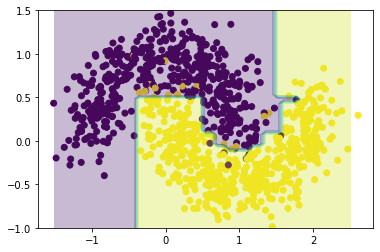

In [20]:
ada = AdaBoostClassifier(clf, n_estimators=10, learning_rate=0.1)
ada.fit(X,Y)
#Thanks to meshgrid from numpy an lindspace create a grid
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
#Predict on the grid values by using xx and yy
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Plot the classification result on the two-moons. You can use contourf() to vizualize the classes
plt.scatter(X[:,0],X[:,1], c = Y)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()

**Question 3:**

AdaBoosted tree is it better thant a single decision tree to capture the two-moon dataset structure? Can we be in an overfitting situation? 

**Solution**

The AdaBoosted tree is better at capturing the dataset’s structure. Of course, until we evaluate the performance on an independent test set, this could simply be a consequence of overfitting (one of AdaBoost’s main weaknesses, as the procedure is sensitive to outliers and noise). We can guard against this eventuality by adjusting the learning rate (which provides a step size for the algorithm’s iterations).

One of **AdaBoost’s main weaknesses**, as the procedure **is sensitive to outliers and noise**. We can guard against this eventuality by adjusting the **learning rate** which provides a step size for the algorithm’s iterations. 

To find the optimal value for the learning rate and the number of estimators, one can use the `GridSearchCV` method from `sklearn.model_selection`, which implements **cross-validation** on a **grid of parameters**. It can also be parallelized, in case the efficiency of the algorithm should ever need improving (that is not necessary on such a small dataset, but could prove useful with larger datasets).

**Question 4:**

Using the `GridSearchCV` method, tune both parameters `n_estimators` and `learning_rate`. In other words, search of the values of these parameters allowing to get the best result? For which values do we get this best result? 

**Solution**

In [21]:
from sklearn.model_selection import GridSearchCV
params = {
     'n_estimators': np.arange(10,300,10), 
     'learning_rate': [0.01, 0.05, 0.1, 1], 
 }
grid_cv = GridSearchCV(AdaBoostClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X,Y) 
grid_cv.best_params_ 
print('The best parameters values are ', grid_cv.best_params_) 

The best parameters values are  {'learning_rate': 0.05, 'n_estimators': 200}


The results show that, given the selected grid search ranges, the optimal parameters (those that provide the best cross-validation fit for the data) are 200 estimators with a learning rate of 0.1. The following plot of the model of these parameters indeed shows that the fit looks might fine.

**Question 5:**

Plot the model of these parameters. The tuned classification model fits fine?

**Solution:**


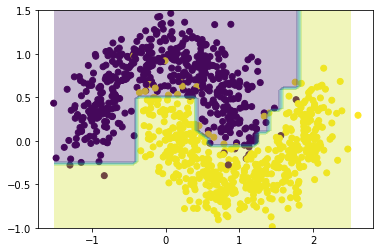

In [22]:
ada = grid_cv.best_estimator_
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1], c = Y)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()

### Gradient Boosting

The implementation of Gradient Boosting is simpler than AdaBoost. The idea is to first fit a model, then to compute the residual generated by this model. Next, a new model is trained, but on the residuals instead of on the original response. The resulting model is added to the first one. Those steps are repeated a sufficient number of times. The final model will be a sum of the initial model and of the subsequent models trained on the chain of residuals. See the Boosting lecture for more details. Also, note that initially users adjusted the depth of the weak learners to **stumps depth** (i.e: 2) but now users prefer to vary between stumps to **interaction models** which have a depth more than 3. There is evidence to suggest that a depth value in  {4, ..., 8} is adequate for most boost applications (see [Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)).


Instead of two-moons dataset we now will consider a training set consisting of a noisy parabola.


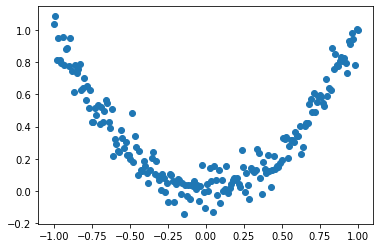

In [23]:
N = 200
X = np.linspace(-1,1,N)
Y = X**2+ np.random.normal(0,0.07,N)
X = X.reshape(-1,1)
plt.scatter(X,Y)
plt.show()

With this data, we can use `DecisionTreeRegressor` from `sklearn.tree` to fit the initial model H_0.

**Question 6:**

Fit and plot on these new data a decision tree regressor with a value of 3 for the `max_depth` parameter(such as we choose initially). 

**Solution**


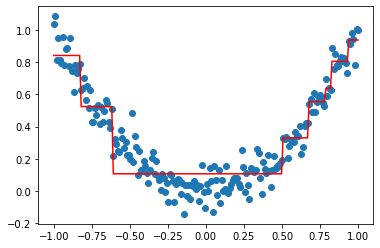

In [24]:
from sklearn.tree import DecisionTreeRegressor
#Construct and fit the decision tree model for the regression task
reg1 = DecisionTreeRegressor(max_depth=3)
reg1.fit(X,Y)
#Plot the data and the model fitting
plt.figure()
plt.scatter(X,Y)
plt.plot(X,reg1.predict(X), 'r')
plt.show()
    

**Question 7**

Now compute the residuals and fit a new model h_1 on it. 

**Solution**

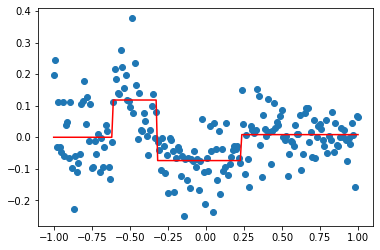

In [25]:
#Compute the residuals named Y2
Y2 = Y - reg1.predict(X)
#Build and fit a new decision tree regressor on the residuals
reg2 = DecisionTreeRegressor(max_depth=2)
reg2.fit(X,Y2)
#Plot the residuals and the model fiting
plt.scatter(X,Y2)
plt.plot(X,reg2.predict(X),'r')
plt.show()


The resulting model at this step is H_1 = H_0 + h_1.

**Question 8**

Plot the parabola data and both models fitting H_0 (in green color) and H_1 (in red color).

**Solution**

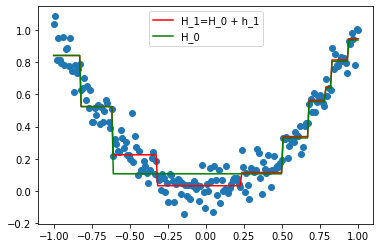

In [26]:
H_0 = reg1.predict(X)
h_1 = reg2.predict(X)
H_1 = H_0 + h_1
plt.scatter(X,Y)
plt.plot(X,H_1,'r', label = "H_1=H_0 + h_1")
plt.plot(X,H_0,'g', label = "H_0")
plt.legend()
plt.show()

Here, you can see that the new model H_1 (in red) is a better fit for the data than H_0 (in green). 

**Question 9**

Repeat this process a second time to get an even better approximation H_2.

**Solution**

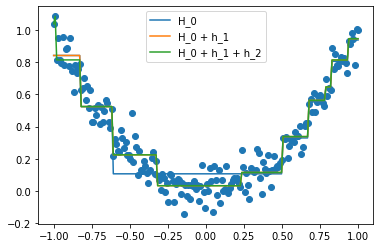

In [27]:
Y3 = Y2 - reg2.predict(X)
reg3 = DecisionTreeRegressor(max_depth=2)
reg3.fit(X,Y3)
h = sum(tree.predict(X) for tree in (reg2,reg3))
H_2 = H_0 + h
#Plot
plt.scatter(X,Y)
plt.plot(X,H_0, label = "H_0")
plt.plot(X,H_1, label = "H_0 + h_1")
plt.plot(X,H_2, label = "H_0 + h_1 + h_2")
plt.legend()
plt.show()

Doing this manually can be tedious, so we use `GradientBoostingRegressor` from `sklearn.ensemble`, which recreates the steps we have produced above.

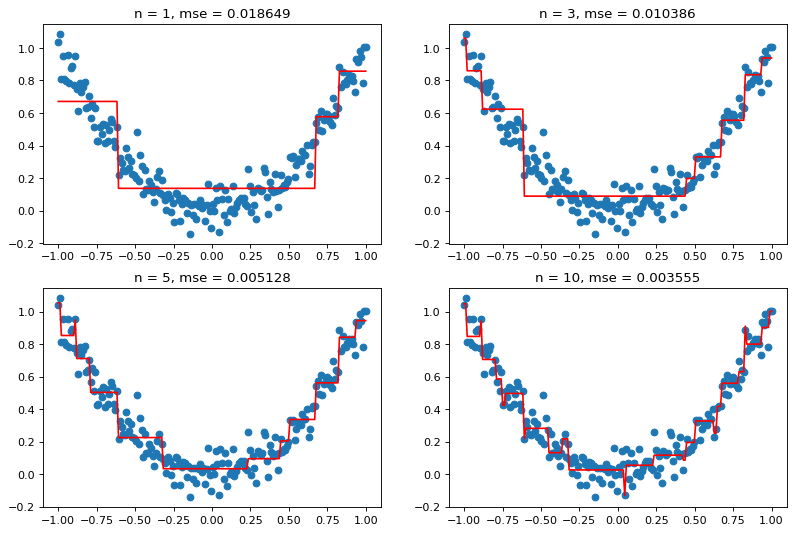

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
for n in enumerate([1,3,5,10]):
    gb = GradientBoostingRegressor(max_depth=2, n_estimators=n[1],learning_rate=1)
    gb.fit(X,Y)
    plt.subplot(2,2,n[0]+1)
    plt.scatter(X,Y)
    plt.plot(X,gb.predict(X), 'r')
    acc = mse(Y, gb.predict(X))
    plt.title('n = %i, mse = %f' %(n[1], acc))

As we can see from the figure above, increasing the number of steps M leads to a better fit, and thus to a  lower **mean squared error (MSE)**. However, this may also lead to overfitting, which is why this M parameter (number of steps) should not be too high. There are many ways to determine the optimal M for a given dataset; cross-validation (as we did for AdaBoost above) is a commonly-used approach.

**Question 10:**

Using the `GridSearchCV` method, tune both parameters `n_estimators` and `learning_rate`. For which values do we get the best result? 

**Solution:**

Best params: {'learning_rate': 1, 'n_estimators': 35}


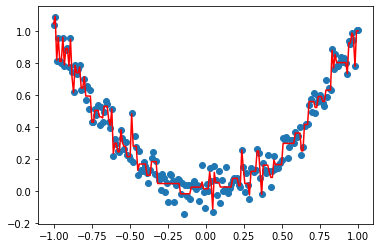

In [29]:
params = {
     'n_estimators': np.arange(1,101),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(GradientBoostingRegressor(max_depth=2), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X,Y)
print("Best params:", grid_cv.best_params_)
clf = grid_cv.best_estimator_
plt.scatter(X,Y)
plt.plot(X,clf.predict(X), 'r')
plt.show()

## Gradient Boosting and Classification

With the appropriate loss function, **Gradient Boosting also works for classification**. Here we will apply Gradient boosting in the classification case on the data generated by the make_moons function from `sklearn.dataset`.

**Question 11**

Such we did at the begining, simulate a two-moons dataset with a size of N=1000 and a noise of 0.2. Then build a Gradient Boosted Classifier and plot the fitted model on the dataset to visualize the classes obtained. 

**Solution**

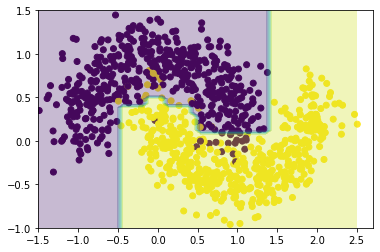

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
N = 1000 
X,Y = make_moons(N,noise=0.2) 
gbc = GradientBoostingClassifier(n_estimators=9, learning_rate=0.5) 
gbc.fit(X,Y) 
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50)) 
Z = gbc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
plt.scatter(X[:,0],X[:,1], c = Y) 
plt.contourf(xx,yy,Z,alpha=0.3) 
plt.show()

**Question 12**

Import the `accuracy_score` from `sklearn.metrics` and print it for the previous model. Comment the accuracy score value.

**Solution**

In [31]:
from sklearn.metrics import accuracy_score
accuracy_gbc=accuracy_score(y_pred=gbc.predict(X), y_true=Y)#To remove
print('Accuracy score ', accuracy_gbc)

Accuracy score  0.974


We can see that the resulting model has a pretty good accuracy as well. Note that if you didn't split the data in train and test sets the accuracy score obtained is meaningless as without some evaluation of the test error.


**Question 13**

If you forgot to use `train_test_split()` function from `sklearn.model_selection` do it now and compute the meaningfull accuracy score value (on the test set of the data).

**Solution**

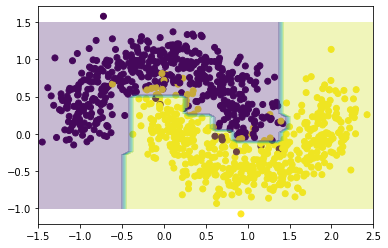

Accuracy score  0.94


In [32]:
from sklearn.model_selection import train_test_split
N = 1000 
X,Y = make_moons(N,noise=0.2) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
gbc = GradientBoostingClassifier(n_estimators=9, learning_rate=0.5) 
gbc.fit(X_train,Y_train) 
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50)) 
Z = gbc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
plt.scatter(X[:,0],X[:,1], c = Y) 
plt.contourf(xx,yy,Z,alpha=0.3) 
plt.show()
accuracy_gbc=accuracy_score(y_pred=gbc.predict(X_test), y_true=Y_test)
print('Accuracy score ', accuracy_gbc)

**Question 14**

Tune the parameters `n_estimators`and `learning_rate`. Plot again the result and print the accuracy (on the test set). 

**Solution**

In [ ]:
params = {
     'n_estimators': np.arange(1,101),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(GradientBoostingClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X_train,Y_train)
print("Best params:", grid_cv.best_params_)
gbc_best = grid_cv.best_estimator_
xx,yy = np.meshgrid(np.linspace(-1.5,2.5,50),np.linspace(-1,1.5,50))
Z = gbc_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0],X[:,1], c = Y)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()
accuracy_gbc_best=accuracy_score(y_pred=gbc_best.predict(X_test), y_true=Y_test)
print('Accuracy score for GBC tuned ', accuracy_gbc_best)